# Graphs for Rapport

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import holidays


In [17]:
def add_features(df):
  ####################### TIMED BASED FEATURES  #######################
  df['Day_of_Week'] = df.index.dayofweek
  df['Hour_of_Day'] = df.index.hour
  df['Month_of_Year'] = df.index.month
  df['Year'] = df.index.year
  df['Day/Night'] = (df['Hour_of_Day'] >= 6) & (df['Hour_of_Day'] <= 18)

  # Add holiday
  us_holidays = holidays.US(years=range(2018, 2023 + 1))
  df['IsHoliday'] = df.index.map(lambda x: 1 if x.date() in us_holidays else 0)

  # Add weekend
  df['Weekend'] = (df['Day_of_Week'] >= 5).astype(int)

  ####################### CYCLIC FEATURES  #######################

  df['HourSin'] = np.sin(2 * np.pi * df['Hour_of_Day'] / 24)
  df['HourCos'] = np.cos(2 * np.pi * df['Hour_of_Day'] / 24)
  df['DayOfWeekSin'] = np.sin(2 * np.pi * df['Day_of_Week'] / 7)
  df['DayOfWeekCos'] = np.cos(2 * np.pi * df['Day_of_Week'] / 7)
  df['MonthOfYearSin'] = np.sin(2 * np.pi * df['Month_of_Year'] / 12)
  df['MonthOfYearCos'] = np.cos(2 * np.pi * df['Month_of_Year'] / 12)

  ####################### SEASONAL FEATURES  #######################
  month_to_season = {1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 2,
                     7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 0}
  df['Season'] = df['Month_of_Year'].map(month_to_season)

  ####################### HISTORICAL CONSUMPTION FEATURES  #######################
  df['Aggregated_charging_load_1h'] = df['Aggregated charging load'].shift(1)
  df['Aggregated_charging_load_6h'] = df['Aggregated charging load'].shift(6)
  df['Aggregated_charging_load_12h'] = df['Aggregated charging load'].shift(12)
  df['Aggregated_charging_load_24h'] = df['Aggregated charging load'].shift(24)
  df['Aggregated_charging_load_1w'] = df['Aggregated charging load'].shift(24*7)
  df['Aggregated_charging_rolling'] = df['Aggregated charging load'].rolling(window=24).mean()

  return df


def parse_date(date):
    return pd.to_datetime(date, format='%b %d, %Y, %I:%M:%S %p')


def filter_data(start_date, end_date, data):
    return data[(data.index >= start_date) & (data.index <= end_date)].copy()


# Define the start and end dates
# start_date = pd.to_datetime('2024-12-31')
# end_date = pd.to_datetime('2032-12-31')
start_date = pd.to_datetime('2029-12-31')
end_date = pd.to_datetime('2030-12-31')

# Load the data
df = pd.read_csv('./DumbCharging_2020_to_2032/Measurements.csv')

df['Timestamp'] = df['Timestamp'].apply(parse_date)
df = df.set_index('Timestamp')

# Add features
feature_df = add_features(df)

# Filter the data
final_df = filter_data(start_date, end_date, feature_df)

print(final_df)


                     Passed hours  Year  Month   Day  Hour  Minute  \
Timestamp                                                            
2029-12-31 00:00:07       87648.0  2029   11.0  31.0   0.0     0.0   
2029-12-31 01:00:07       87649.0  2029   11.0  31.0   1.0     0.0   
2029-12-31 02:00:07       87650.0  2029   11.0  31.0   2.0     0.0   
2029-12-31 03:00:07       87651.0  2029   11.0  31.0   3.0     0.0   
2029-12-31 04:00:07       87652.0  2029   11.0  31.0   4.0     0.0   
...                           ...   ...    ...   ...   ...     ...   
2030-12-30 19:00:07       96403.0  2030   11.0  30.0  19.0     0.0   
2030-12-30 20:00:07       96404.0  2030   11.0  30.0  20.0     0.0   
2030-12-30 21:00:07       96405.0  2030   11.0  30.0  21.0     0.0   
2030-12-30 22:00:07       96406.0  2030   11.0  30.0  22.0     0.0   
2030-12-30 23:00:07       96407.0  2030   11.0  30.0  23.0     0.0   

                     Total number of EVs  Number of charging EVs  \
Timestamp            

# Plots 

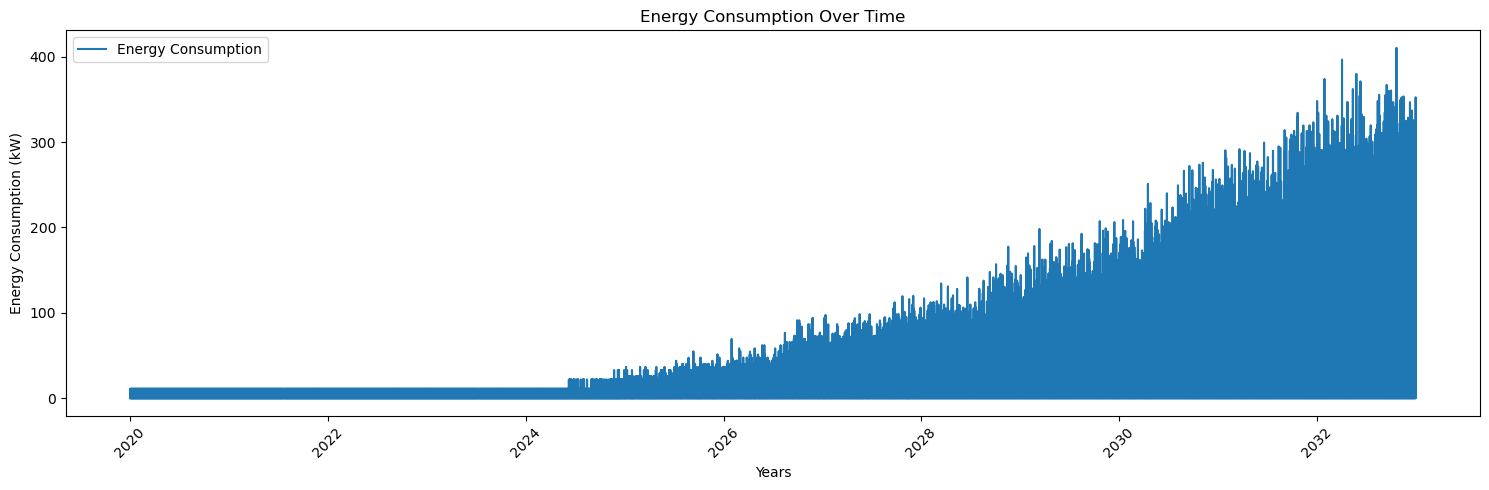

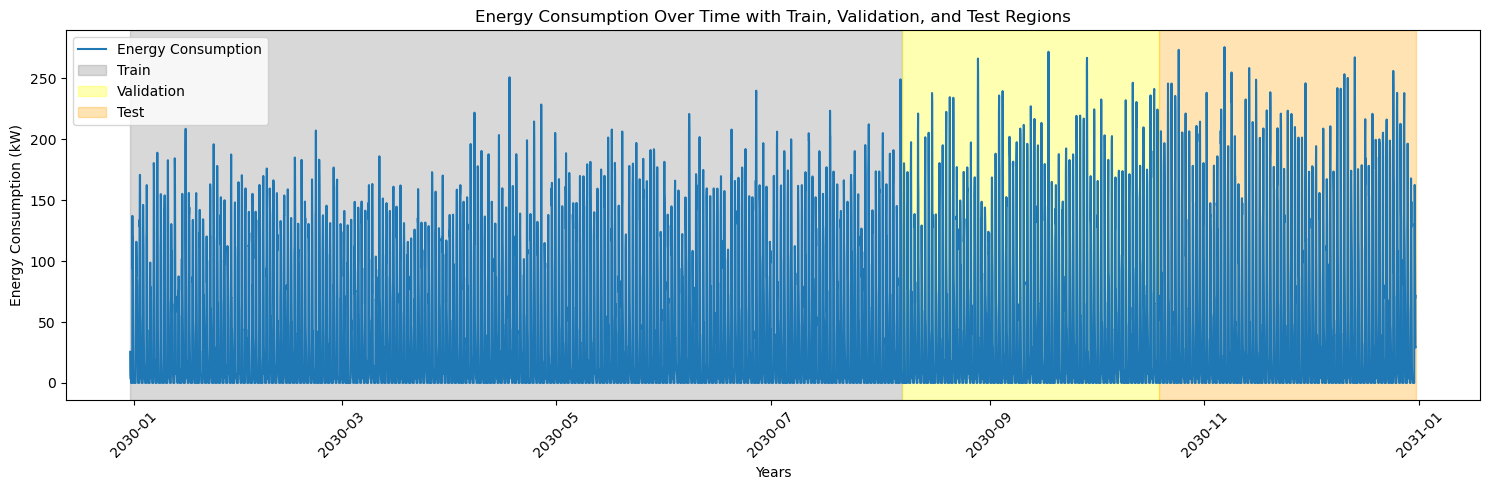

Starting number of EVs: 49.0
Ending number of EVs: 69.0


In [22]:
#Plot the data
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Aggregated charging load'], label='Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.xlabel('Years')
plt.ylabel('Energy Consumption (kW)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(
    '../Report/Figures/SDUDumb/SDU_Aggregated_Charging_Load_Hours.png', dpi=400)
plt.show()


train_start_date = pd.to_datetime('2029-12-31 00:00:00')
train_end_date = pd.to_datetime('2030-08-07 00:00:00')
val_start_date = pd.to_datetime('2030-08-07 01:00:00')
val_end_date = pd.to_datetime('2030-10-19 00:00:00')
test_start_date = pd.to_datetime('2030-10-19 01:00:00')
test_end_date = pd.to_datetime('2030-12-31 00:00:00')

# 2029-12-31 00:00:00 2030-08-07 00:00:00
# ----------------------------------------
# 2030-08-07 01:00:00 2030-10-19 00:00:00
# ----------------------------------------
# 2030-10-19 01:00:00 2030-12-31 00:00:00


plt.figure(figsize=(15, 5))
plt.plot(final_df.index, final_df['Aggregated charging load'], label='Energy Consumption')
plt.axvspan(train_start_date, train_end_date, color='grey', alpha=0.3, label='Train')
plt.axvspan(val_start_date, val_end_date, color='yellow', alpha=0.3, label='Validation')
plt.axvspan(test_start_date, test_end_date, color='orange', alpha=0.3, label='Test')
plt.title('Energy Consumption Over Time with Train, Validation, and Test Regions')
plt.xlabel('Years')
plt.ylabel('Energy Consumption (kW)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(
    '../Report/Figures/SDUDumb/SDU_Aggregated_Charging_Load_Hours_Train_Val_Test.png')
plt.show()

# Starting number of EVs 
print("Starting number of EVs:", final_df['Total number of EVs'].iloc[0])
# Ending number of EVs
print("Ending number of EVs:", final_df['Total number of EVs'].iloc[-1])





# plt.figure(figsize=(15, 5))
# plt.plot(final_df.index, final_df['Aggregated charging load'], label='Energy Consumption')
# plt.title('Energy Consumption Over Time')
# plt.xlabel('Date')
# plt.ylabel('Energy Consumption')
# plt.xticks(rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.savefig('../Rapport/Figures/SDU/SDU_Aggregated_Charging_Load_Sessions_Filtred', dpi=1200)
# plt.show()

## Analysis

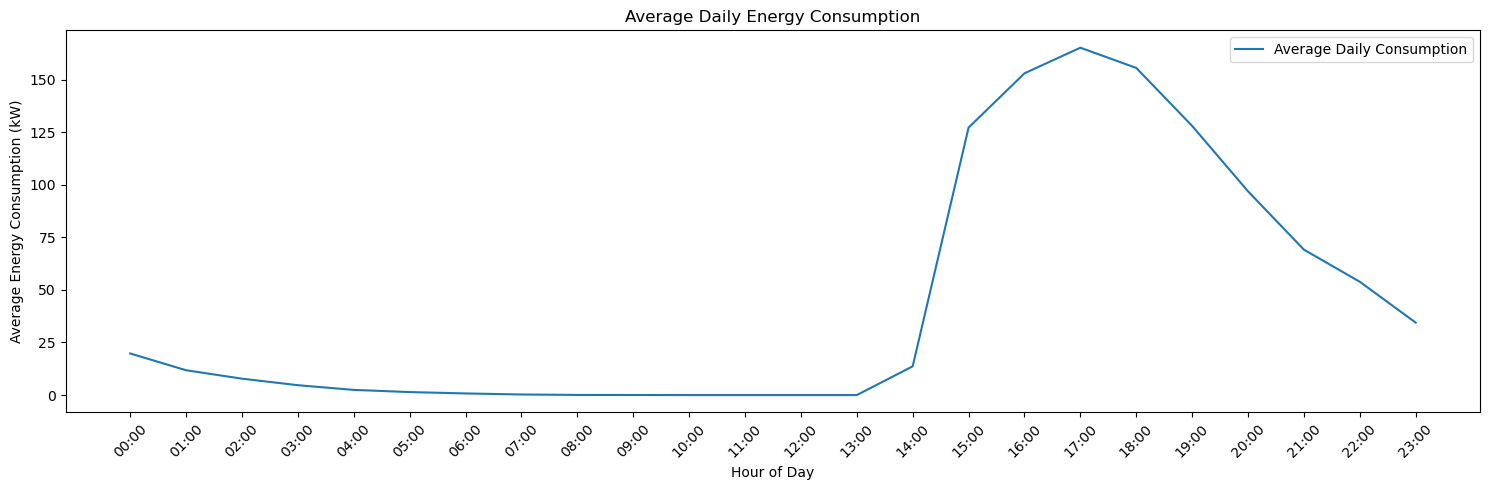

In [16]:
x_names = ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00',
           '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']

# Plot the average daily consumption
plt.figure(figsize=(15, 5))
plt.plot(x_names, final_df.groupby(final_df.index.hour)['Aggregated charging load'].mean(), label='Average Daily Consumption')
plt.title('Average Daily Energy Consumption')
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy Consumption (kW)')
plt.xticks(range(0, 24), x_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('../Report/Figures/SDUDumb/SDU_Aggregated_Charging_Load_Sessions_Avg_Hourly.png')
plt.show()

# #### Montly ####
# monthly_avg = final_df.groupby(['Year', 'Month_of_Year'])[
#     'Aggregated charging load'].mean().reset_index()

# x_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
#            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


# plt.figure(figsize=(15, 5))
# for year in monthly_avg['Year'].unique():
#     ydata = monthly_avg[monthly_avg['Year'] == year]
#     plt.plot(ydata['Month_of_Year'], ydata['Aggregated charging load'],
#              label=f'Avg Daily Consumption {year}')
# plt.title(f'Average Energy Consumption per Month of the Year')
# plt.xlabel('Month of the Year')
# plt.ylabel('Average Energy Consumption')
# plt.xticks(ticks=range(1, 13), labels=x_names, rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.show()


# # Day of the week average energy consumption for each year
# x_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# # Create a 'Date' column by extracting the date part from the index of final_df
# final_df['Date'] = final_df.index.date
# daily_df = final_df.groupby(['Year', 'Date'])[
#     'Aggregated charging load'].sum().reset_index()

# # Extract day of week
# daily_df['Date'] = pd.to_datetime(daily_df['Date'])
# daily_df['Day_of_Week'] = daily_df['Date'].dt.dayofweek

# # Avg daily consumption
# weekly_avg = daily_df.groupby(['Year', 'Day_of_Week'])[
#     'Aggregated charging load'].mean().reset_index()

# plt.figure(figsize=(15, 5))
# for year in weekly_avg['Year'].unique():
#     weekly_avg = daily_df[daily_df['Year'] == year].groupby(
#         'Day_of_Week')['Aggregated charging load'].mean()
#     plt.plot(weekly_avg.index, weekly_avg.values,
#              label=f'Average Energy Consumption {year}')
# plt.title(f'Average Energy Consumption per Day of the Week')
# plt.xlabel('Day of the Week')
# plt.ylabel('Average Energy Consumption')
# plt.xticks(ticks=range(7), labels=x_names, rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.show()

## Testing dataset

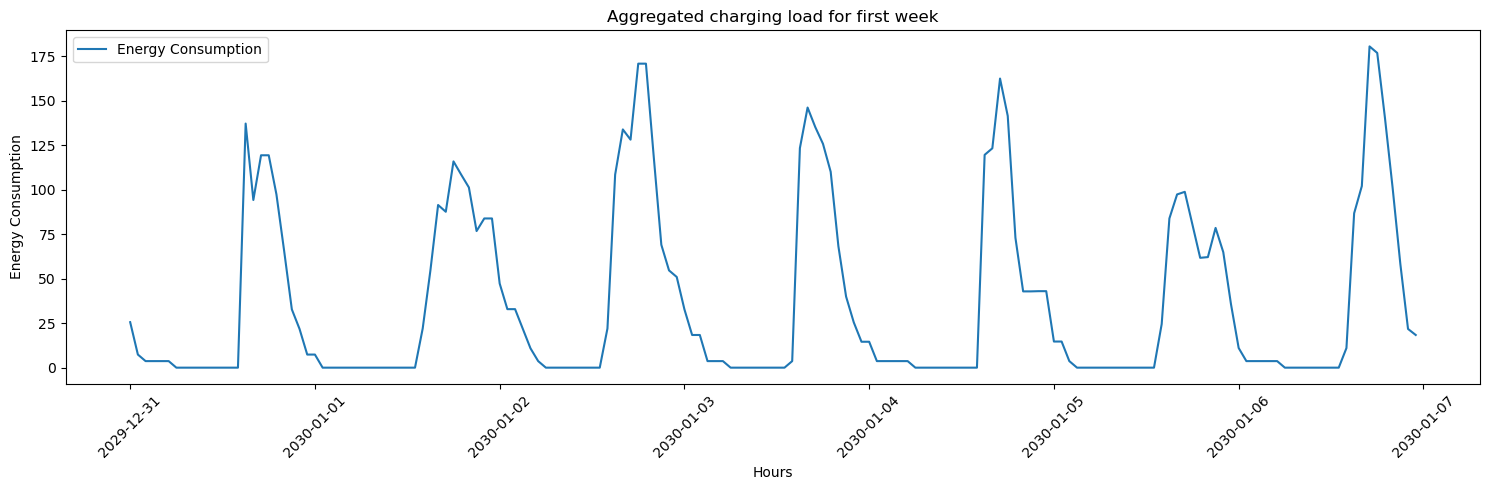

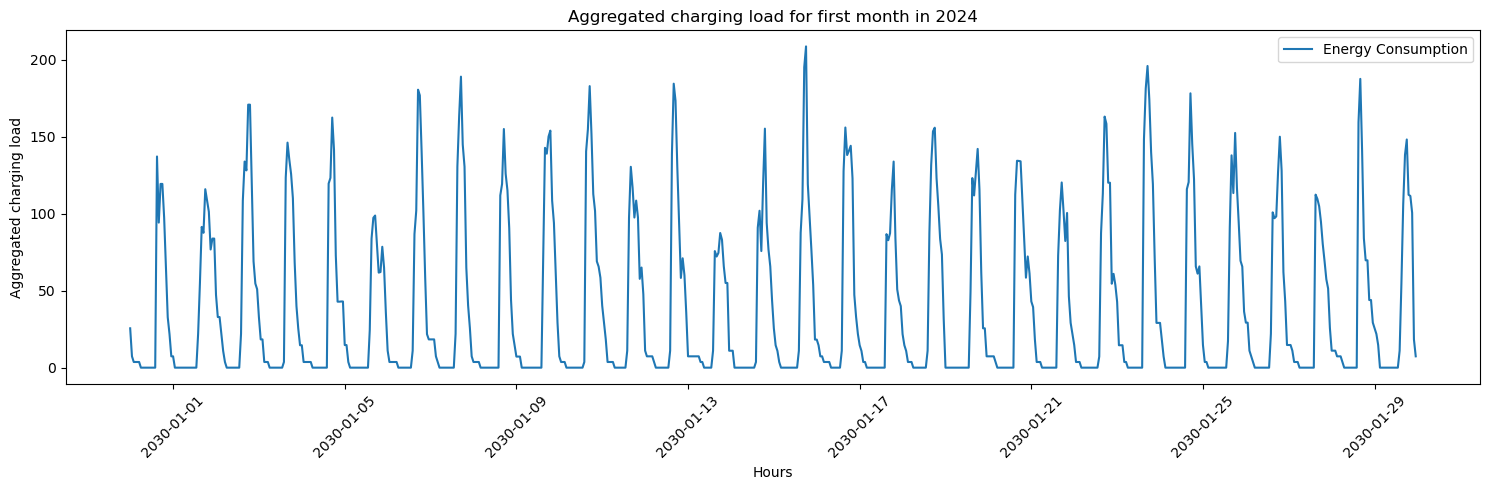

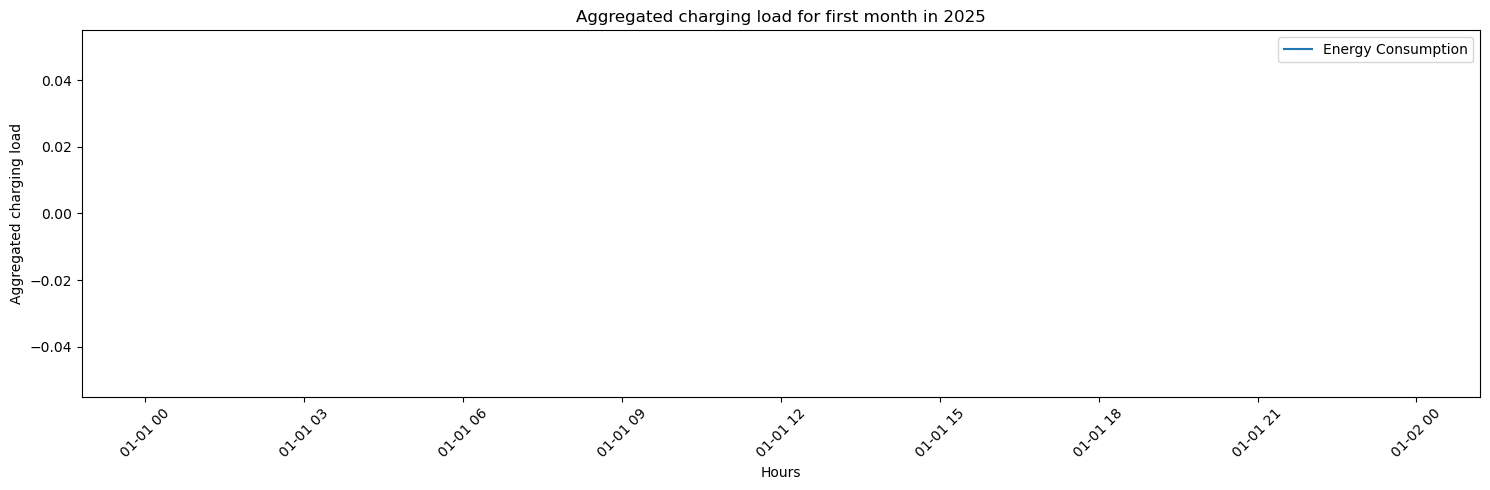

In [13]:
# PLot the first week of the dataset
plt.figure(figsize=(15, 5))
plt.plot(final_df.index[:24*7], final_df['Aggregated charging load'][:24*7], label='Energy Consumption')
plt.title('Aggregated charging load for first week')
plt.xlabel('Hours')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the first month of the dataset
plt.figure(figsize=(15, 5))
plt.plot(final_df.index[:24*30], final_df['Aggregated charging load'][:24*30], label='Energy Consumption')
plt.title('Aggregated charging load for first month in 2024')
plt.xlabel('Hours')
plt.ylabel('Aggregated charging load')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Plot the First month of 2025  
filtered_2025_df_start = pd.to_datetime('2025-01-01')
filtered_2025_df_end = pd.to_datetime('2025-01-31')
filtered_2025_df = filter_data(filtered_2025_df_start, filtered_2025_df_end, final_df)

plt.figure(figsize=(15, 5))
plt.plot(filtered_2025_df.index, filtered_2025_df['Aggregated charging load'], label='Energy Consumption')
plt.title('Aggregated charging load for first month in 2025')
plt.xlabel('Hours')
plt.ylabel('Aggregated charging load')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



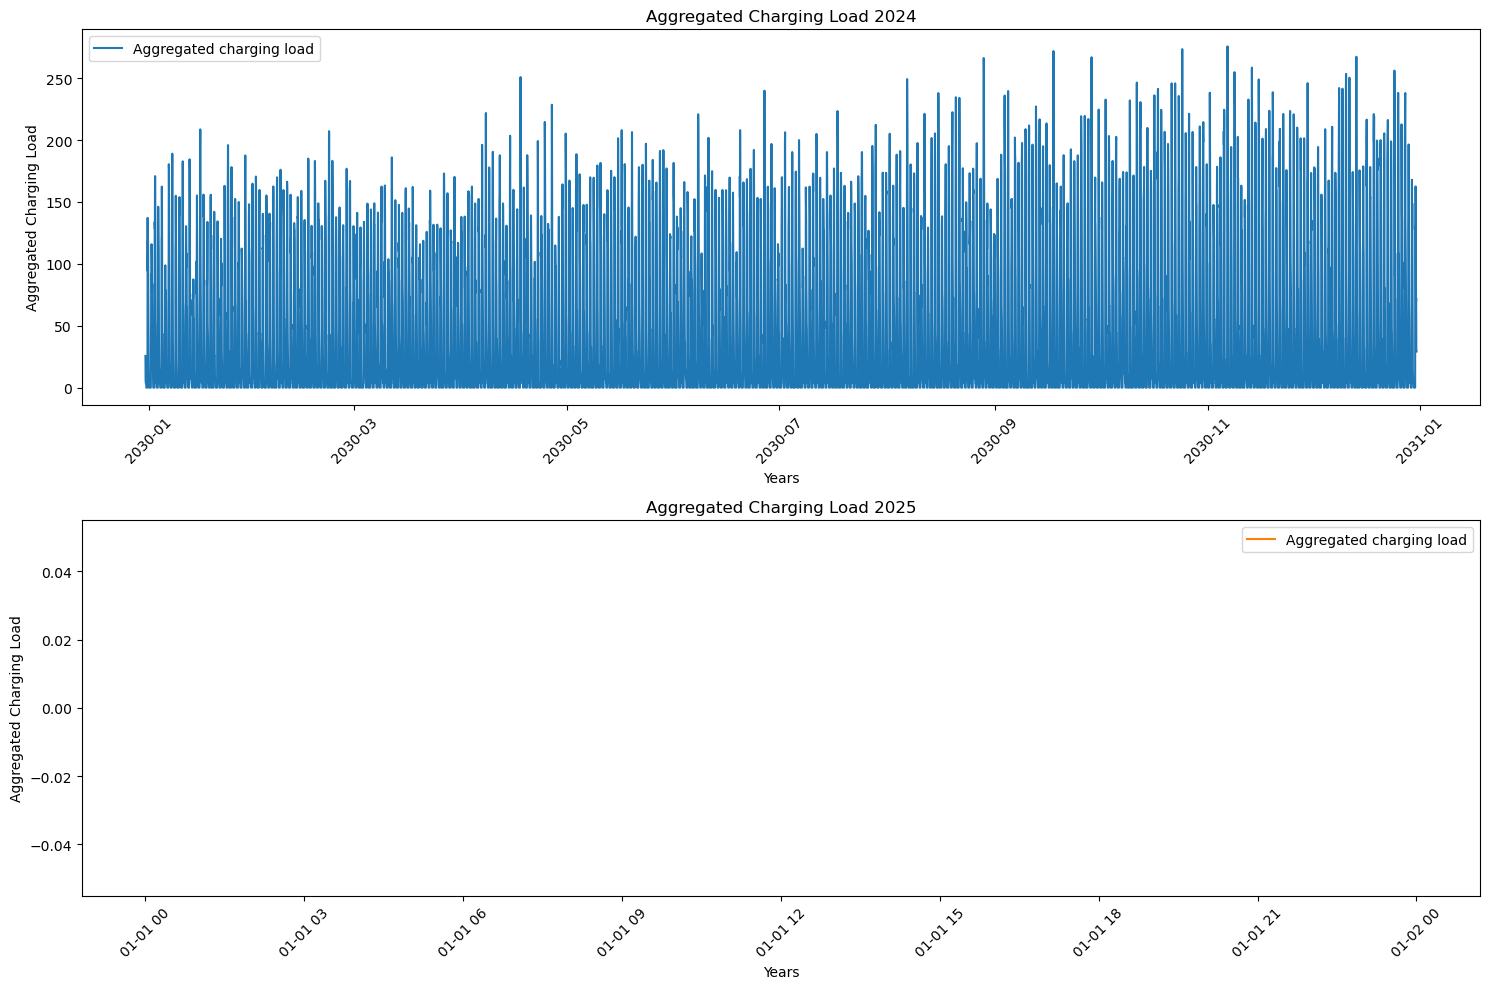

In [14]:
import matplotlib.pyplot as plt

# Create subplots without shared axes
fig, axes = plt.subplots(2, 1, figsize=(15, 10))  # No sharex/sharey

# Plot first year (2024) - Top
axes[0].plot(final_df.index[:24*365], final_df['Aggregated charging load']
             [:24*365], label='Aggregated charging load', color='tab:blue')
axes[0].set_title('Aggregated Charging Load 2024')
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Aggregated Charging Load')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

# Plot second year (2025) - Bottom
axes[1].plot(final_df.index[24*365:24*730], final_df['Aggregated charging load']
             [24*365:24*730], label='Aggregated charging load', color='tab:orange')
axes[1].set_title('Aggregated Charging Load 2025')
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Aggregated Charging Load')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()
plt.tight_layout()
plt.show()

## For each year

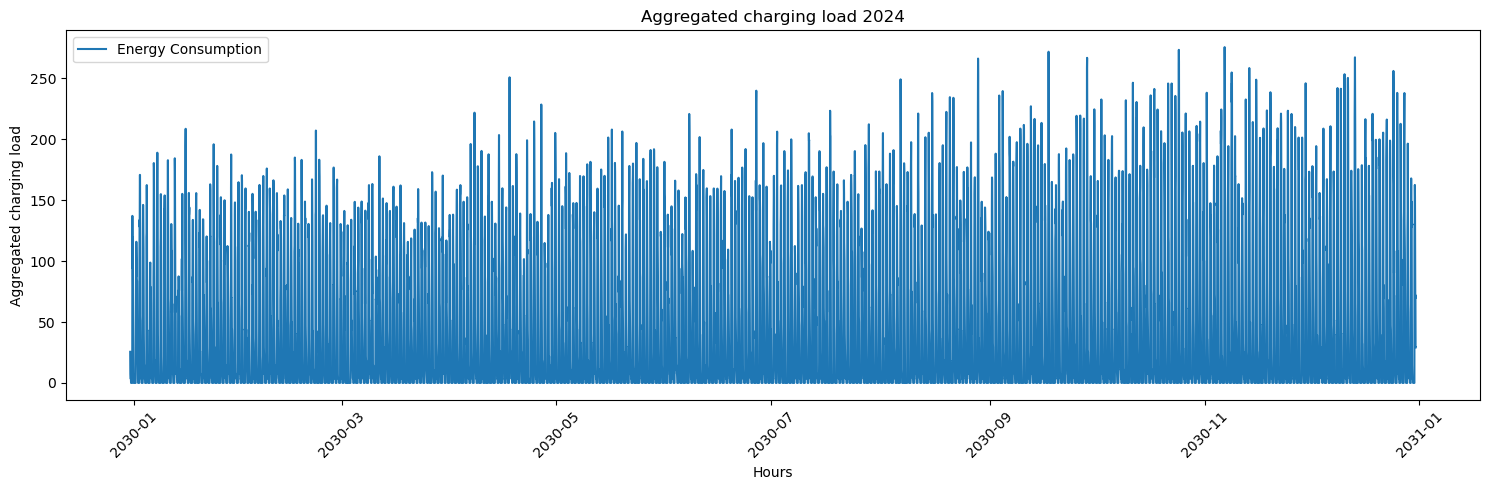

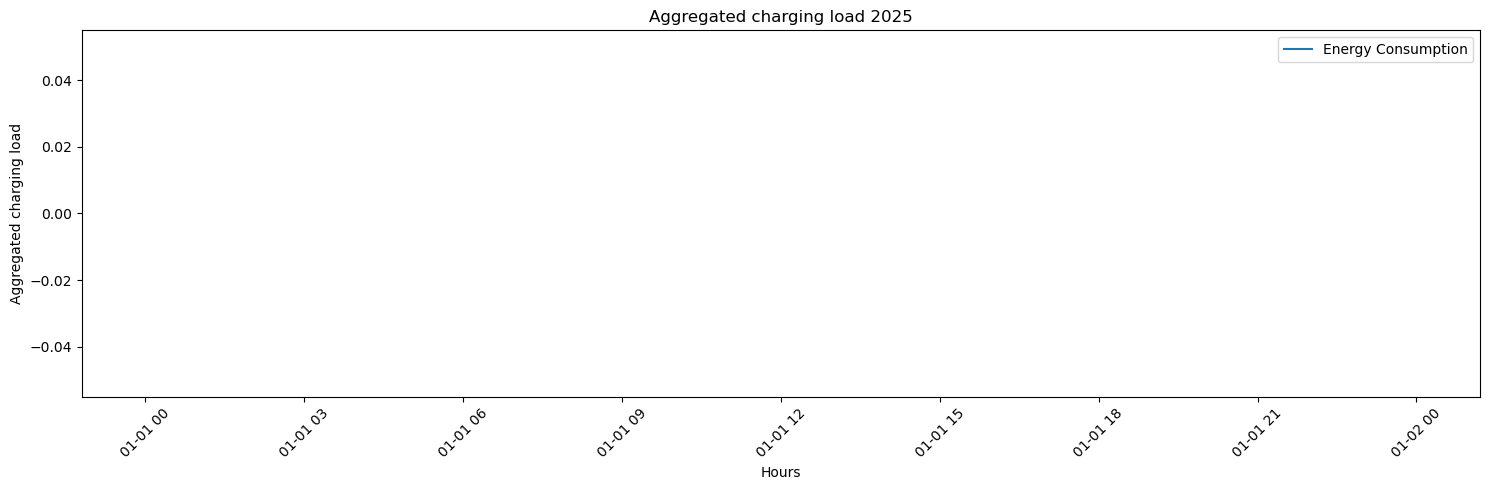

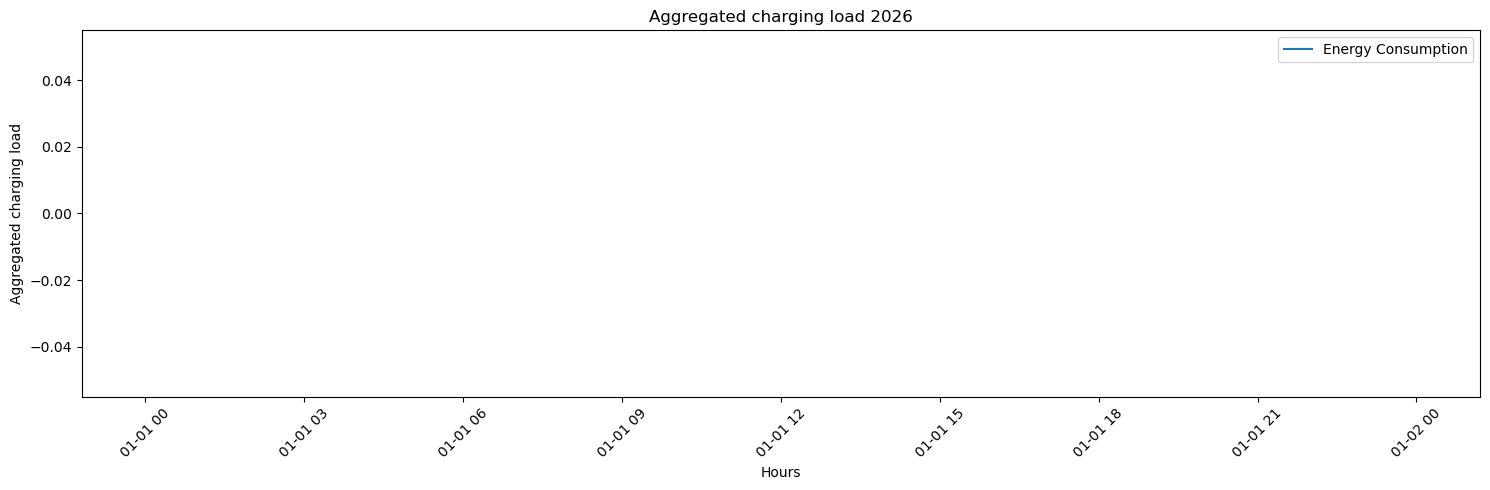

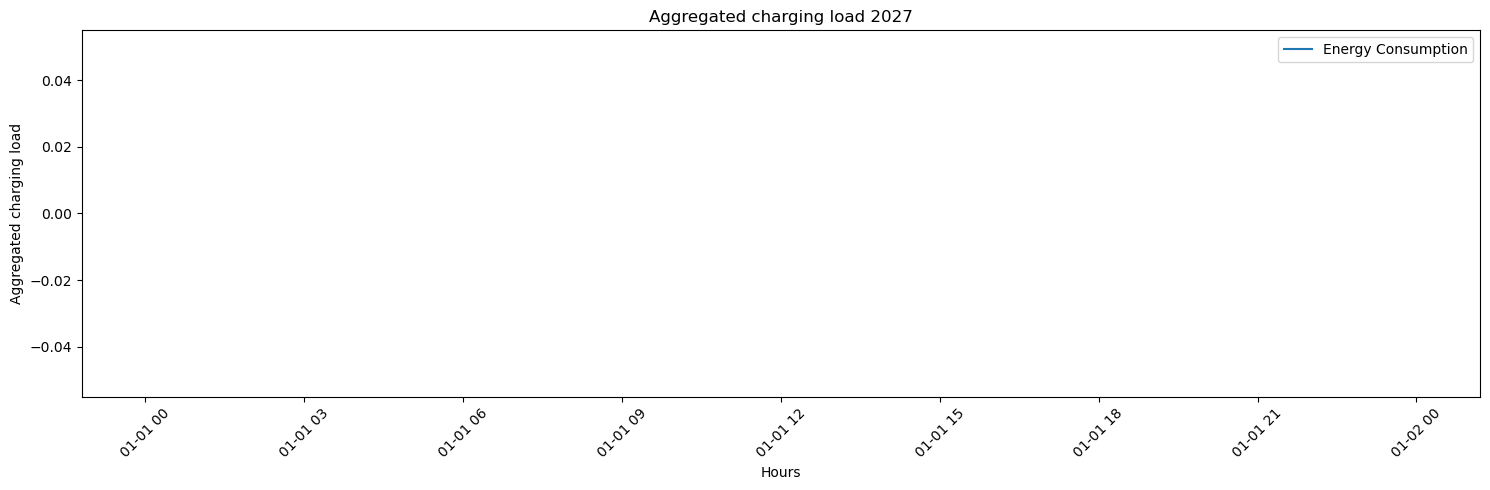

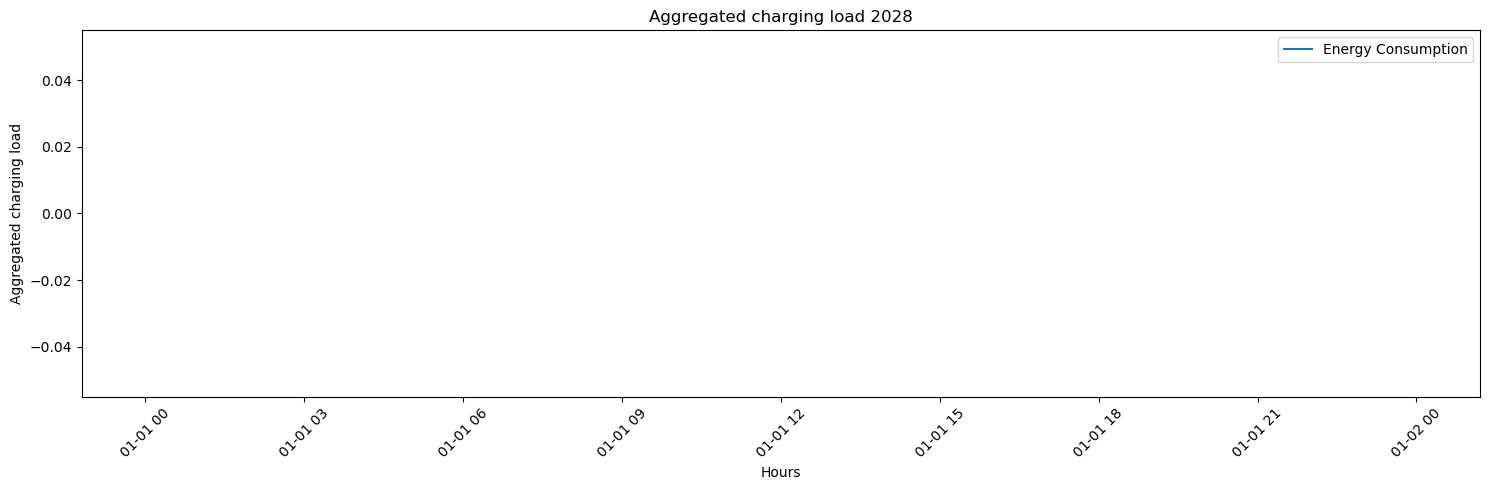

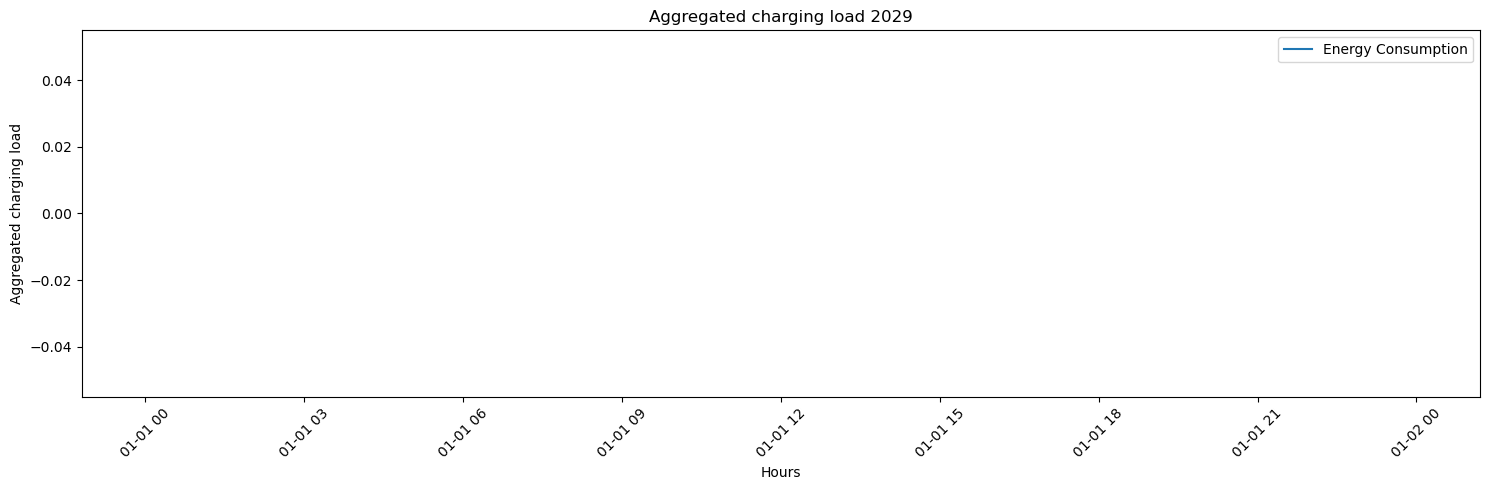

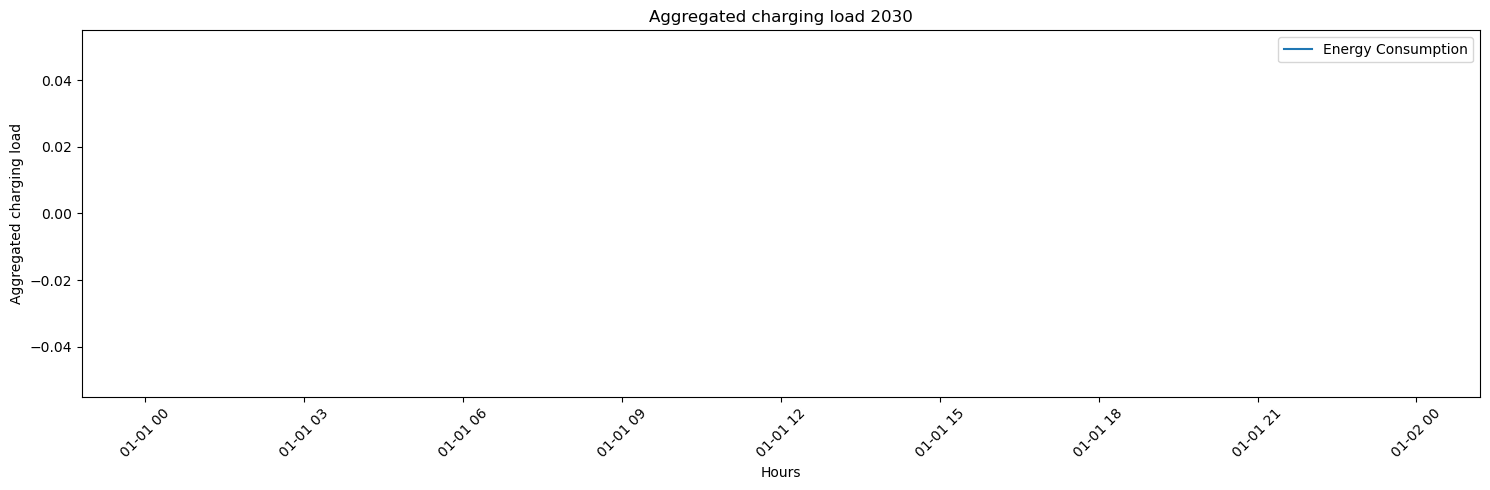

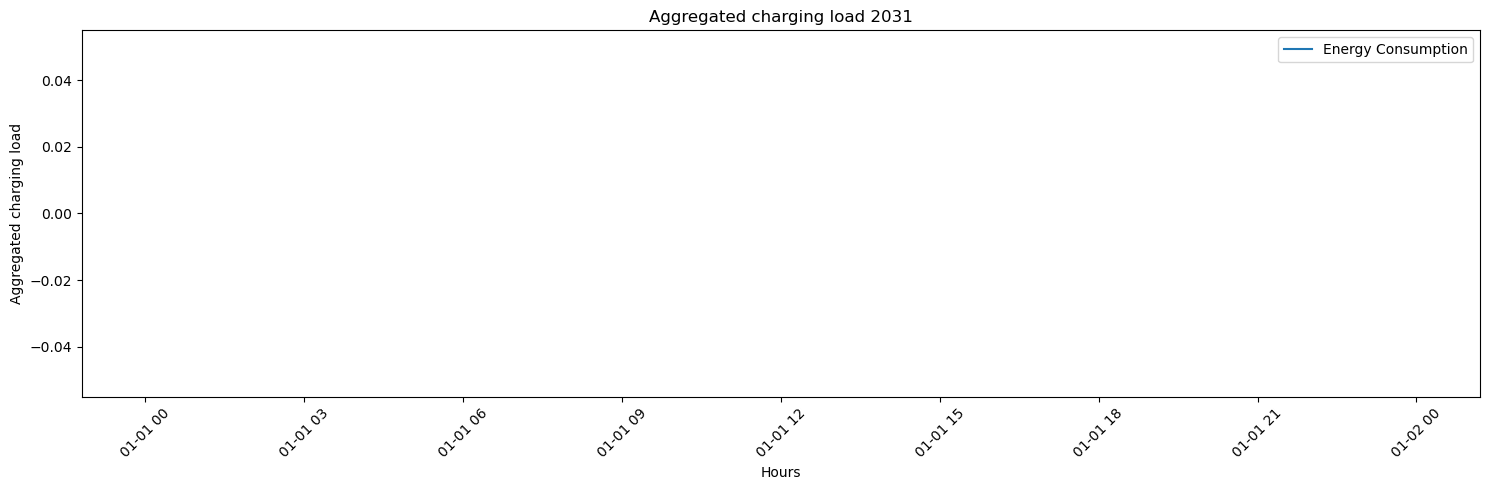

In [15]:
# Plot the first year of the dataset
plt.figure(figsize=(15, 5))
plt.plot(final_df.index[:24*365], final_df['Aggregated charging load']
         [:24*365], label='Energy Consumption')
plt.title('Aggregated charging load 2024')
plt.xlabel('Hours')
plt.ylabel('Aggregated charging load')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the second year of the dataset
plt.figure(figsize=(15, 5))
plt.plot(final_df.index[24*365:24*730], final_df['Aggregated charging load']
         [24*365:24*730], label='Energy Consumption')
plt.title('Aggregated charging load 2025')
plt.xlabel('Hours')
plt.ylabel('Aggregated charging load')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the third year of the dataset
plt.figure(figsize=(15, 5))
plt.plot(final_df.index[24*730:24*1095], final_df['Aggregated charging load']
         [24*730:24*1095], label='Energy Consumption')
plt.title('Aggregated charging load 2026')
plt.xlabel('Hours')
plt.ylabel('Aggregated charging load')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the fourth year of the dataset
plt.figure(figsize=(15, 5))
plt.plot(final_df.index[24*1095:24*1460], final_df['Aggregated charging load']
         [24*1095:24*1460], label='Energy Consumption')
plt.title('Aggregated charging load 2027')
plt.xlabel('Hours')
plt.ylabel('Aggregated charging load')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the fifth year of the dataset
plt.figure(figsize=(15, 5))
plt.plot(final_df.index[24*1460:24*1825], final_df['Aggregated charging load']
         [24*1460:24*1825], label='Energy Consumption')
plt.title('Aggregated charging load 2028')
plt.xlabel('Hours')
plt.ylabel('Aggregated charging load')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the sixth year of the dataset
plt.figure(figsize=(15, 5))
plt.plot(final_df.index[24*1825:24*2190], final_df['Aggregated charging load']
         [24*1825:24*2190], label='Energy Consumption')
plt.title('Aggregated charging load 2029')
plt.xlabel('Hours')
plt.ylabel('Aggregated charging load')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the seventh year of the dataset
plt.figure(figsize=(15, 5))
plt.plot(final_df.index[24*2190:24*2555], final_df['Aggregated charging load']
         [24*2190:24*2555], label='Energy Consumption')
plt.title('Aggregated charging load 2030')
plt.xlabel('Hours')
plt.ylabel('Aggregated charging load')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the eighth year of the dataset
plt.figure(figsize=(15, 5))
plt.plot(final_df.index[24*2555:24*2920], final_df['Aggregated charging load']
         [24*2555:24*2920], label='Energy Consumption')
plt.title('Aggregated charging load 2031')
plt.xlabel('Hours')
plt.ylabel('Aggregated charging load')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()